# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 8.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
340498,0.0024,0.0024,0.0024,0.0024,0.0024,0.0415,0.1929,0.0220,0.0024,0.0220,0,0,0,0
181767,0.0024,0.1050,0.1709,0.3149,0.0952,0.0488,0.3491,0.5713,0.1929,0.6616,7,7,10,10
387891,0.0024,0.0024,0.0024,0.0024,0.0049,0.0049,0.1025,0.0830,0.0024,0.0122,0,0,0,0
65012,0.0366,0.1318,0.0513,0.1245,0.0366,0.0464,0.3516,1.9385,0.3467,2.5049,8,8,8,8
282230,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1294,0.0342,0.0024,0.0732,0,0,0,0


In [3]:
raw_data.shape

(449730, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449730 entries, 0 to 449729
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          449730 non-null  float64
 1   Emg2          449730 non-null  float64
 2   Emg3          449730 non-null  float64
 3   Emg4          449730 non-null  float64
 4   Emg5          449730 non-null  float64
 5   Emg6          449730 non-null  float64
 6   Emg7          449730 non-null  float64
 7   Emg8          449730 non-null  float64
 8   Emg9          449730 non-null  float64
 9   Emg10         449730 non-null  float64
 10  repetition    449730 non-null  int64  
 11  rerepetition  449730 non-null  int64  
 12  stimulus      449730 non-null  int64  
 13  restimulus    449730 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.0 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000
mean,0.009672,0.077479,0.072574,0.050732,0.022604,0.050304,0.215483,0.240273,0.077911,0.196562,3.278532,2.272719,5.811698,4.161110
std,0.014184,0.193192,0.232346,0.150322,0.063215,0.096565,0.406609,0.383662,0.201897,0.360472,3.492835,3.274170,6.608935,6.308636
min,0.000000,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.031700,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.002400,0.004900,0.080600,0.100100,0.002400,0.046400,2.000000,0.000000,3.000000,0.000000
75%,0.012200,0.058600,0.029300,0.022000,0.007300,0.061000,0.273400,0.300300,0.053700,0.249000,6.000000,4.000000,11.000000,8.000000
max,0.820300,3.728000,4.663100,3.754900,1.384300,1.635700,4.665500,4.668000,3.415500,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     181641
12     15520
2      15500
4      15500
8      15495
7      15494
9      15474
11     15470
6      15458
5      15452
3      15436
10     15417
1      15408
14     10345
13     10336
17     10328
15     10292
16     10267
19      5175
21      5162
18      5160
23      5138
20      5132
22      5130
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

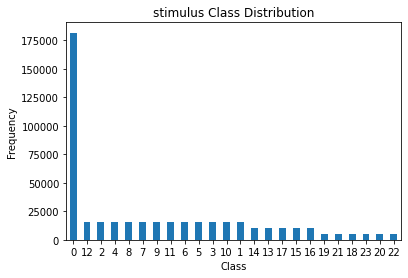

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
408312,0.0049,0.0073,0.0049,0.0024,0.0024,0.0562,0.1465,0.2319,0.0024,0.0439,0,0,0,0
322798,0.0024,0.0024,0.0024,0.0024,0.0024,0.0708,0.1831,0.0415,0.0024,0.0439,0,0,0,0
121423,0.0073,0.5322,0.6299,0.2930,0.1294,0.2026,0.9497,1.0034,1.2427,0.7373,5,5,3,3
217905,0.0024,0.1636,0.0684,0.0586,0.1440,0.5176,2.4268,1.7432,0.0879,1.9287,10,10,14,14
378447,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1758,0.0049,0.0024,0.0293,0,0,0,0


In [12]:
raw_data.shape

(364664, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364664 entries, 0 to 449729
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          364664 non-null  float64
 1   Emg2          364664 non-null  float64
 2   Emg3          364664 non-null  float64
 3   Emg4          364664 non-null  float64
 4   Emg5          364664 non-null  float64
 5   Emg6          364664 non-null  float64
 6   Emg7          364664 non-null  float64
 7   Emg8          364664 non-null  float64
 8   Emg9          364664 non-null  float64
 9   Emg10         364664 non-null  float64
 10  repetition    364664 non-null  int64  
 11  rerepetition  364664 non-null  int64  
 12  stimulus      364664 non-null  int64  
 13  restimulus    364664 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 41.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(ccp_alpha= 0.0,
              class_weight= None,
              criterion = "entropy",
              max_depth = None,
              max_features = None,
              max_leaf_nodes = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              random_state = None,
              splitter = 'best')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 84.16903185115106


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     36119
           1       0.88      0.86      0.87      1954
           2       0.82      0.83      0.83      1922
           3       0.76      0.78      0.77      2033
           4       0.76      0.76      0.76      2058
           5       0.73      0.72      0.72      2110
           6       0.82      0.81      0.81      2091
           7       0.71      0.72      0.72      2167
           8       0.74      0.72      0.73      2207
           9       0.70      0.68      0.69      2223
          10       0.73      0.68      0.71      1851
          11       0.78      0.78      0.78      2086
          12       0.74      0.74      0.74      2125
          13       0.75      0.76      0.75      1388
          14       0.66      0.70      0.68      1386
          15       0.71      0.71      0.71      1459
          16       0.77      0.78      0.77      1382
 

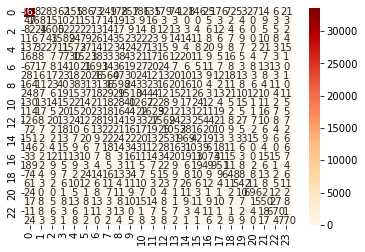

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.205243168387424
MSE: 13.452812855634624
RMSE: 3.6678076361274217


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8416474245641785
Recall Score :  0.8416903185115105
f1_score :  0.8416088145381464


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(algorithm = 'ball_tree',
                                            leaf_size = 30,
                                            metric = 'minkowski',
                                            metric_params= None,
                                            n_jobs = -1,
                                            n_neighbors = 2,
                                            p = 1,
                                            weights = 'distance')
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=-1, n_neighbors=2, p=1,
                     weights='distance')

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 89.99218460779072


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     36119
           1       0.96      0.95      0.96      1954
           2       0.93      0.92      0.93      1922
           3       0.90      0.88      0.89      2033
           4       0.89      0.86      0.87      2058
           5       0.84      0.80      0.82      2110
           6       0.92      0.90      0.91      2091
           7       0.81      0.79      0.80      2167
           8       0.85      0.82      0.84      2207
           9       0.83      0.78      0.80      2223
          10       0.87      0.81      0.84      1851
          11       0.91      0.87      0.89      2086
          12       0.87      0.85      0.86      2125
          13       0.89      0.88      0.89      1388
          14       0.77      0.80      0.79      1386
          15       0.76      0.78      0.77      1459
          16       0.92      0.90      0.91      1382
 

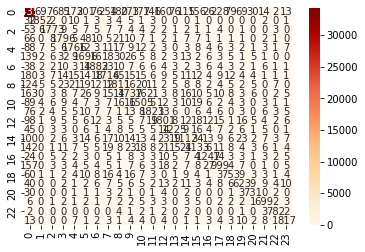

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.8245375892942838
MSE: 9.556140567370052
RMSE: 3.0913007888864605


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8993264500204763
Recall Score :  0.8999218460779072
f1_score :  0.8994260789177263


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(
              bootstrap = True,
              ccp_alpha = 0.0,
              class_weight =  None,
              criterion = 'entropy',
              max_depth = None,
              max_features = 'auto' ,
              max_leaf_nodes = None,
              max_samples = None,
              min_impurity_decrease = 0.0,
              min_samples_leaf = 1,
              min_samples_split = 2,
              min_weight_fraction_leaf = 0.0,
              n_estimators = 400,
              n_jobs = None,
              oob_score = False,
              random_state = None,
              verbose = 0,
              warm_start = False)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 91.71705537959497


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     36119
           1       0.97      0.95      0.96      1954
           2       0.95      0.91      0.93      1922
           3       0.92      0.90      0.91      2033
           4       0.94      0.85      0.89      2058
           5       0.89      0.83      0.86      2110
           6       0.97      0.90      0.93      2091
           7       0.86      0.80      0.83      2167
           8       0.89      0.85      0.87      2207
           9       0.90      0.77      0.83      2223
          10       0.93      0.79      0.86      1851
          11       0.94      0.87      0.90      2086
          12       0.92      0.84      0.87      2125
          13       0.95      0.86      0.90      1388
          14       0.83      0.81      0.82      1386
          15       0.83      0.82      0.83      1459
          16       0.94      0.89      0.91      1382
 

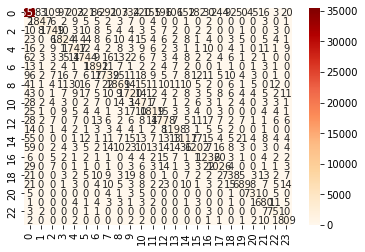

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6812691100050732
MSE: 7.853111760108593
RMSE: 2.80234040760729


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9173222981092973
Recall Score :  0.9171705537959497
f1_score :  0.9158905187146149


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score = None,
              booster = 'gbtree',
              colsample_bylevel = None,
              colsample_bynode = None,
              colsample_bytree = None,
              enable_categorical = False,
              gamma = 0,
              gpu_id = None,
              importance_typen = None,
              interaction_constraints = None,
              learning_rate = 0.5,
              max_delta_step = None,
              max_depth = 50,
              min_child_weight = 1,
              monotone_constraints = None,
              n_estimators = 400,
              n_jobs = None,
              num_parallel_tree = None,
              objective = 'multi:softmax',
              predictor = 'gpu_predictor',
              random_state = None,
              reg_alpha = None,
              reg_lambda = None,
              scale_pos_weight = None,
              subsample = None,
              tree_method = None,
              use_label_encoder = True,
              validate_parameters = None,
              verbosity = None)
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[17:15:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None, importance_typen=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=50, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob',
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.70242551382776


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     36119
           1       0.96      0.94      0.95      1954
           2       0.93      0.91      0.92      1922
           3       0.90      0.88      0.89      2033
           4       0.90      0.84      0.87      2058
           5       0.86      0.81      0.83      2110
           6       0.94      0.90      0.92      2091
           7       0.84      0.80      0.82      2167
           8       0.86      0.83      0.84      2207
           9       0.86      0.77      0.81      2223
          10       0.88      0.79      0.84      1851
          11       0.92      0.86      0.89      2086
          12       0.88      0.84      0.86      2125
          13       0.91      0.86      0.88      1388
          14       0.80      0.78      0.79      1386
          15       0.79      0.80      0.80      1459
          16       0.89      0.88      0.89      1382
 

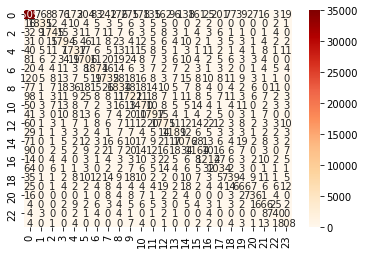

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.735551807823619
MSE: 8.342588403054858
RMSE: 2.8883539262103697


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9060731981649067
Recall Score :  0.9070242551382776
f1_score :  0.9059620374512026


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier(bootstrap = False,
             ccp_alpha = 0.0,
             class_weight = None,
             criterion = 'entropy',
             max_depth = None,
             max_features = 'auto',
             max_leaf_nodes = None,
             max_samples = None,
             min_impurity_decrease = 0.0,
             min_samples_leaf = 1,
             min_samples_split = 2,
             min_weight_fraction_leaf = 0.0,
             n_estimators = 400,
             n_jobs = None,
             oob_score = False,
             random_state = None,
             verbose = 0,
             warm_start = False)
extratree.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', n_estimators=400)

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.9350636885909


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     36119
           1       0.98      0.94      0.96      1954
           2       0.97      0.92      0.94      1922
           3       0.93      0.91      0.92      2033
           4       0.95      0.85      0.90      2058
           5       0.90      0.83      0.87      2110
           6       0.97      0.91      0.94      2091
           7       0.87      0.81      0.84      2167
           8       0.90      0.84      0.87      2207
           9       0.90      0.78      0.83      2223
          10       0.94      0.80      0.87      1851
          11       0.94      0.88      0.91      2086
          12       0.93      0.84      0.88      2125
          13       0.95      0.86      0.91      1388
          14       0.83      0.81      0.82      1386
          15       0.84      0.82      0.83      1459
          16       0.95      0.90      0.92      1382
 

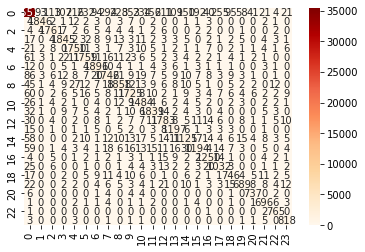

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6769912111115681
MSE: 7.862243428900498
RMSE: 2.803969227523815


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9199070614345225
Recall Score :  0.919350636885909
f1_score :  0.9181359228014014
